# Vou fazer com o dataset da datacamp e com o do DataSprints

## Data Pre-processing and Visualization

In [1]:
import pandas as pd
import numpy as np
import sklearn
loan_data = pd.read_csv('d:/dev/datacamp/Preparing for Machine Learning Interview Questions in Python/LoansTrainingSetReduced.csv')
pd.set_option("display.max_columns", 200)


In [2]:
print(loan_data.head(3))

   Loan Status  Current Loan Amount        Term  Credit Score  \
0  Charged Off                12232  Short Term         728.0   
1  Charged Off                25014   Long Term         733.0   
2  Charged Off                16117  Short Term         724.0   

   Years in current job Home Ownership  Annual Income            Purpose  \
0                   1.0           Rent        46643.0  DebtConsolidation   
1                  10.0       Mortgage        81099.0  DebtConsolidation   
2                   9.0       Mortgage        60438.0   HomeImprovements   

   Monthly Debt  Years of Credit History  Months since last delinquent  \
0        777.39                     18.0                          10.0   
1        892.09                     26.7                           NaN   
2       1244.02                     16.7                          32.0   

   Number of Open Accounts  Number of Credit Problems  Current Credit Balance  \
0                       12                          0   

## Detecção de Outlier

In [3]:
# Boxplots monovariados e multivariados
# Univariate and multivariate boxplots
# veja que aqui o x e y são os eixos do boxplot 
# loan status é campo texto, que tem as categorias Chardeg Off e Fully Paid (este é o bloxpot multivariado)<br>

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Annual Income'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Annual Income', data=loan_data, ax=ax[1])
plt.show()

# a caixa da esquerda é Annual Income (rendimento anual), até 02 estão as pessoas comuns e tem uns lá no alto que ganham muito.
# O box vai da faixa 0 até 1
# os status do empréstimo (loan status), realmente se dividem em Charged Off e Fully paid cobrado e pago

print(loan_data['Annual Income'].head())


<Figure size 640x480 with 2 Axes>

0    46643.0
1    81099.0
2    60438.0
3    34171.0
4    47003.0
Name: Annual Income, dtype: float64


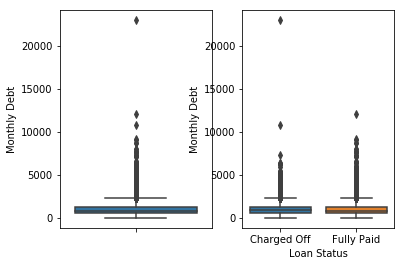

In [4]:

# Multivariate boxplot
# o monthly debt vai de 0 a 2000 são os pontos no boxplot e o Loan Status é charged off e fully paid
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Monthly Debt'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Monthly Debt', data=loan_data, ax=ax[1])
plt.show()


# Manipulando outliers

Pense no seguinte cenário: a maioria dos pontos tem um forte relacionamento positivo, no entanto, devido a alguns outliers, a correlação de Pearson é negativa. Para isto usamos Winsorize


*** Winsorize foi inventado por Charles P. Winsor (1895-1951). O efeito é o mesmo que o recorte no processamento de sinais.***

Você aprendeu como visualizar valores discrepantes pode ser útil em uma entrevista de aprendizado de máquina. Outra maneira conveniente de lidar com valores discrepantes é calcular a pontuação Z que fornece um limite para os valores discrepantes aproximadamente +/- 3 desvios-padrão da média.

Neste exercício, você usará o módulo scipy.stats para calcular o Z-score usando a função stats.zscore () e a função mstats.winsorize () para substituir outliers usando uma técnica chamada Winsorizing.

Lembre-se da vídeo aula que os pontos acima e / ou abaixo de 1,5 vezes o IQR devem ser considerados possíveis outliers. Para a última etapa deste exercício, esse valor é 2120.

Os pacotes relevantes foram importados para você, e as colunas numéricas e categóricas de loan_data foram subdivididas e salvas como numeric_cols e categoric_cols, respectivamente.

-----


You learned how visualizing outliers could come in handy in a machine learning interview. Another convenient way for handling outliers is by calculating the Z-score que fornece um limite para os valores discrepantes aproximadamente +/- 3 desvios-padrão da média.

In this exercise, you will use the scipy.stats module to calculate the Z-score using the stats.zscore() function and the mstats.winsorize() function to replace outliers using a technique called Winsorizing.

Recall from the video lesson that those points above and/or below 1.5 times the IQR should be suspected as possible outliers. For the last step in this exercise, that value is 2120.

The relevant packages have been imported for you, and loan_data's numeric and categorical columns have been subset and saved as numeric_cols and categoric_cols, respectively.

In [5]:
# Antes de rodar tem que definir uma listinha com nomes das colunas numericas:
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

In [6]:
from scipy import stats
categoric_cols = loan_data[[i for i in loan_data.columns if i not in numeric_cols.columns]]

# Print: before dropping
print("before dropping")
print(numeric_cols.mean())
print(numeric_cols.median())
print(numeric_cols.max())


#Create an index of rows to keep for absolute z-scores less than 3 on the numeric columns and 
#use it to index and concatenate subsets.
# Create index of rows to keep
idx = (np.abs(stats.zscore(numeric_cols)) < 3).all(axis=1)

# Concatena subsets numericos e categoricos
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)

# Print: after dropping
print(ld_out_drop.mean())
print(ld_out_drop.median())
print(ld_out_drop.max())

before dropping
Current Loan Amount             1.433878e+07
Credit Score                    7.216020e+02
Years in current job            5.721263e+00
Annual Income                   7.234575e+04
Monthly Debt                    9.631021e+02
Years of Credit History         1.831531e+01
Months since last delinquent    3.508029e+01
Number of Open Accounts         1.111035e+01
Number of Credit Problems       1.604769e-01
Current Credit Balance          1.543593e+04
Maximum Open Credit             3.356812e+04
Bankruptcies                    1.126716e-01
Tax Liens                       2.822209e-02
dtype: float64
Current Loan Amount             14355.000
Credit Score                      730.000
Years in current job                6.000
Annual Income                   61494.000
Monthly Debt                      843.925
Years of Credit History            17.000
Months since last delinquent       32.000
Number of Open Accounts            10.000
Number of Credit Problems           0.000
Curren

C:\Users\94275793668\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


# winsorize

deu o seguinte erro
C:\Users\94275793668\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less, este erro também apareceu no caderno original
  


In [7]:
from scipy.stats import mstats
# Print: Média do Monthly Debt Antes do winsorize
print((loan_data['Monthly Debt']).mean())
# print((loan_data['Monthly Debt']).median())
# print((loan_data['Monthly Debt']).max())

# faz Winsorize nas columnas numéricas
debt_win =  mstats.winsorize(loan_data['Monthly Debt'], limits=[0.05, 0.05])

# Converte para DataFrame, atribui nome de coluna novamente
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: depois de aplicar winsorize
print(debt_out.mean())
# print(debt_out.median())
# print(debt_out.max())

963.1020592734293
Monthly Debt    935.371257
dtype: float64


veja que melhorou bastante a média
# Substituir pela mediana

In [8]:
# Print: Antes de substituir com a mediana
print((loan_data['Monthly Debt']).mean())
# print((loan_data['Monthly Debt']).median())
# print((loan_data['Monthly Debt']).max())

# Ache a mediana
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

# Print: depois de substituir com a mediana
print((loan_data['Monthly Debt']).mean())
# print((loan_data['Monthly Debt']).median())
# print((loan_data['Monthly Debt']).max())

963.1020592734293
866.8290722078564


Veja como melhorou a média, isto é porque tirei os outliers

# Z-score standardization

In [9]:
from sklearn.preprocessing import StandardScaler
# Subset features
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=[object])

# Instantiate
scaler = StandardScaler()

# Fit and transform, convert to DF
numeric_cols_scaled = scaler.fit_transform(numeric_cols)
numeric_cols_scaledDF = pd.DataFrame(numeric_cols_scaled, columns=numeric_cols.columns)

# Concatenate categoric columns to scaled numeric columns
final_DF = pd.concat([numeric_cols_scaledDF, categoric_cols], axis =1)
final_DF.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term,Home Ownership,Purpose
0,-0.408982,0.233271,-1.312259,-0.440413,-0.195819,-0.044731,-1.139583,0.178701,-0.338742,-0.441228,-0.097522,-0.328203,-0.109587,Charged Off,Short Term,Rent,DebtConsolidation
1,-0.408617,0.415570,1.189261,0.149986,0.055307,1.189463,NaN,0.580434,-0.338742,1.031104,0.168967,-0.328203,-0.109587,Charged Off,Long Term,Mortgage,DebtConsolidation
2,-0.408871,0.087432,0.911314,-0.204037,0.825827,-0.229151,-0.139960,-0.022165,1.772105,-0.211660,-0.071377,2.584717,-0.109587,Charged Off,Short Term,Mortgage,HomeImprovements
3,-0.408997,0.670788,-0.756366,-0.654119,0.271730,-1.179622,NaN,1.986499,-0.338742,-0.428664,0.037928,-0.328203,-0.109587,Charged Off,Short Term,Rent,DebtConsolidation
4,-0.409052,-1.298038,1.189261,-0.434244,-0.795018,-0.229151,-0.458022,0.379568,1.772105,0.075136,-0.053344,2.584717,-0.109587,Charged Off,Long Term,Mortgage,HomeImprovements
